In [2]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-12-03 12:57:56--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-12-03 12:57:56--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc43c931946405187b48c4b5086a.dl.dropboxusercontent.com/cd/0/inline/BbLaPcyboWRhWuN9O5XrfhrGhz_uMgYxxcfTs5Uq0Kw5PnstA2RyfGl2QJVBPtJS3uzP_lPqnHctl_wA2TDasiBuPLeYrKPuOJ-p9ft_-e583kQVCZVvnpu_NSD95NzNw-HanbpgdtxaFalW13X5Wi1O/file# [following]
--2021-12-03 12:57:56--  https://uc43c931946405187b48c4b5086a.dl.dropboxusercontent.com/cd/0/inline/BbLaPcyboWRhWuN9O5XrfhrGhz_uMgYxxcfTs5Uq0Kw5PnstA2RyfGl2QJVBPtJS3uzP_lPqnHctl_wA2

In [6]:
import pandas as pd
name_of_file = "./data/data_000637.txt"
data = pd.read_csv(name_of_file)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


1. Create a Pandas DataFrame reading N rows of the data/data_000637.txt dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [9]:
import random
R = random.randint(10000,1310720)
print("R is Random")
print(R)
defi = pd.read_csv(name_of_file, nrows=R)
defi

R is Random
186894


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
186889,1,1,139,3869202026,2853,0
186890,1,1,1,3869202026,2847,18
186891,1,1,10,3869202026,2851,9
186892,1,1,2,3869202026,2843,16


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [12]:
bx_co = data['BX_COUNTER'].max()
print(bx_co)

3563


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [20]:
orbit_value = data['ORBIT_CNT'].iloc[len(data.index)-1] - data['ORBIT_CNT'].iloc[0]
bx_value = data['BX_COUNTER'].iloc[len(data.index)-1] - data['BX_COUNTER'].iloc[0]
tdc_value = data['TDC_MEAS'].iloc[len(data.index)-1] - data['TDC_MEAS'].iloc[0]

time_sec = orbit_value*bx_co*25e-9 + bx_value*25e-9 + tdc_value*25e-9/30
time_minutes = time_sec/60
time_hours = time_minutes/60
print("TIME ESTIMATED: \n")
print("IN SECOND: \n",time_sec)
print("IN MINUTES:\n",time_minutes)
print("IN HOURS \n",time_hours)

TIME ESTIMATED: 

IN SECOND: 
 0.9801409933333333
IN MINUTES:
 0.01633568322222222
IN HOURS 
 0.000272261387037037


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

---



In [21]:
##nanosec ex
defi['nanosectime'] = df['ORBIT_CNT']*bx_co*25+df['BX_COUNTER']*25+defi['TDC_MEAS']*25/30
print("new col with nanosec ")
defi

new col with nanosec 


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,nanosectime
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
186889,1,1,139,3869202026,2853,0,3.446492e+14
186890,1,1,1,3869202026,2847,18,3.446492e+14
186891,1,1,10,3869202026,2851,9,3.446492e+14
186892,1,1,2,3869202026,2843,16,3.446492e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [24]:
noisyTDC=defi.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)
print("NOISY CHANNEL \n")

print(noisyTDC[0:3])

NOISY CHANNEL 

TDC_CHANNEL
139    15525
64      9274
63      9051
dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [28]:
nonempty_orbits = len(defi.groupby('ORBIT_CNT').count())
print("NONEMPTY ORBITS :")
print(nonempty_orbits,"\n")

nonempty139=df[df['TDC_CHANNEL']==139].groupby('ORBIT_CNT').count()
print("UNIQUE ORBITS --> TDC_CHANNEL=139 ")
print(len(nonempty139))

NONEMPTY ORBITS :
1858 

UNIQUE ORBITS --> TDC_CHANNEL=139 
5978


7. Optional: Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

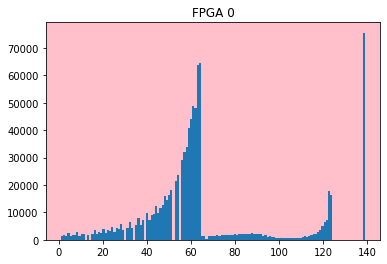

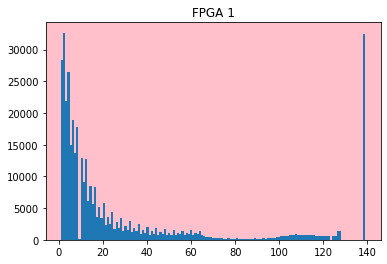

In [45]:
import matplotlib.pyplot as plot

FPGA_0 = data[data['FPGA'] == 0]["TDC_CHANNEL"]
FPGA_1 = data[data['FPGA'] == 1]["TDC_CHANNEL"]
ch_0 = data[data['FPGA'] == 0]["TDC_CHANNEL"].max()
ch_1 = data[data['FPGA'] == 1]["TDC_CHANNEL"].max()

plot.rcParams.update({'axes.facecolor':'pink'})
plot.figure(facecolor='white') 

plot.hist(FPGA_0,bins=c_0)
plot.title('FPGA 0')
plot.show()
print("\n")

plot.figure(facecolor='white') 
plot.hist(FPGA_1,bins=ch_1)
plot.title('FPGA 1')
plot.show()